In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m
import xgboost as xgb
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [33]:
#Load Data
df = pd.read_csv('../datasets/target_model/CICIDS2017/combined_data_new_0311_1.csv')
df

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMean,BwdPacketLengthStd,...,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_backward,act_data_pkt_fwd,ActiveStd,ActiveMax,IdleStd,Binary_class
0,30971,2,2,86,142,43,0.000000,71,71.000000,0.000000,...,2,86,2,142,-1,1,0.000000e+00,0,0.000000e+00,0
1,5666302,2,1,12,0,6,0.000000,0,0.000000,0.000000,...,2,12,1,0,385,1,0.000000e+00,0,0.000000e+00,0
2,51562962,105,189,8591,260537,0,265.861220,2920,1378.502646,549.562937,...,105,8591,189,260537,45,104,2.773718e+06,5562552,3.530694e+02,0
3,6692,2,0,0,0,0,0.000000,0,0.000000,0.000000,...,2,0,0,0,-1,0,0.000000e+00,0,0.000000e+00,0
4,119750498,22,21,1428,8169,0,149.763594,1737,389.000000,629.401462,...,22,1428,21,8169,1015,21,8.093919e+05,2862684,1.064364e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586993,381200,3,6,26,11607,0,10.263203,5840,1934.500000,2538.919278,...,3,26,6,11607,229,2,0.000000e+00,0,0.000000e+00,1
586994,7816287,8,4,56,11601,0,5.656854,10135,2900.250000,4871.825830,...,8,56,4,11601,229,6,0.000000e+00,720322,0.000000e+00,1
586995,56,1,1,2,6,2,0.000000,6,6.000000,0.000000,...,1,2,1,6,0,0,0.000000e+00,0,0.000000e+00,1
586996,49,1,1,2,6,2,0.000000,6,6.000000,0.000000,...,1,2,1,6,0,0,0.000000e+00,0,0.000000e+00,1


In [34]:
# change column name "Binary to "Label"
df.rename(columns={'Binary_class': 'Label'}, inplace=True)
df['Label'].value_counts()  

Label
0    523771
1     63227
Name: count, dtype: int64

In [35]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X = df.drop(columns=['Label'], axis=1)
y = df['Label']

# Initial train test split set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Further split training set into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (422638, 42)
Validation set shape: (46960, 42)
Testing set shape: (117400, 42)


In [80]:
# save datasets
train = pd.concat([X_train, y_train], axis=1)
val = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)
train.to_csv('../datasets/target_model/CICIDS2017/X_train.csv', index=False) #datasets\target_model\CICIDS2017
val.to_csv('../datasets/target_model/CICIDS2017/X_val.csv', index=False)
test.to_csv('../datasets/target_model/CICIDS2017/X_test.csv', index=False)

KeyboardInterrupt: 

[Text(0, 0, '45524'), Text(0, 0, '5058'), Text(0, 0, '12645')]

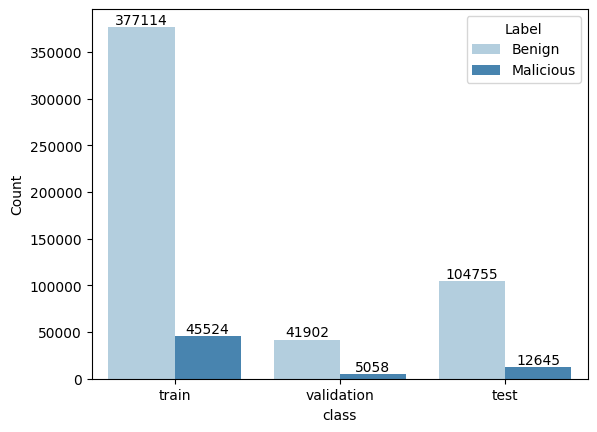

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_distribution = train.value_counts('Label')
train_distribution = train_distribution.reset_index()
train_distribution["class"] = "train"

val_distribution = val.value_counts('Label')
val_distribution = val_distribution.reset_index()
val_distribution["class"] = "validation"

test_distribution = test.value_counts('Label')
test_distribution = test_distribution.reset_index()
test_distribution["class"] = "test"

total_distribution = pd.concat([train_distribution, val_distribution, test_distribution])

total_distribution.columns = ["Label", "Count", "class"]
grade_map = {
    0: "Benign",
    1: "Malicious"}
total_distribution["Label"] = total_distribution["Label"].map(grade_map)

total_distribution
ax = sns.barplot(x="class", y="Count", hue="Label", data=total_distribution, palette="Blues" )
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

In [37]:

# # smote
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(k_neighbors=3, random_state=42)
# X_sm, y_sm = sm.fit_resample( X_train, y_train)

# X_train = pd.DataFrame(X_sm, columns=X_train.columns)
# y_train = pd.DataFrame(y_sm, columns=['Label'])

In [38]:
# # save training set to csv
# train_set = pd.concat([X_train, y_train], axis=1)
# train_set.to_csv('datasets/target_model/CICIDS2017/combined_data_new_SMOTE_0308_1.csv', index=False)

# # save validation set to csv
# val_set = pd.concat([X_val, y_val], axis=1)
# val_set.to_csv('datasets/target_model/CICIDS2017/combined_data_new_val_0308_1.csv', index=False)

# # save testing set to csv
# test_set = pd.concat([X_test, y_test], axis=1)
# test_set.to_csv('datasets/target_model/CICIDS2017/combined_data_new_test_0308_1.csv', index=False)


### Xgboost

In [39]:
# # import torch
# # device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# # device
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# # Training
# xgb_start_train = time.time()
# model_xgb = xgb.XGBClassifier(
#     early_stopping_rounds=10,
#     # device = device
# )

# # cupy_X_train = cupy.array(X_train)
# # cupy_X_test = cupy.array(X_test)
# # cupy_X_val = cupy.array(X_val)
# # cupy_y_train = cupy.array(y_train)
# # cupy_y_test = cupy.array(y_test)
# # cupy_y_val = cupy.array(y_val)

# model_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
# xgb_end_train = time.time()
# xgb_training_time = xgb_end_train - xgb_start_train



In [40]:
# # Testing
# xgb_start_test = time.time()
# y_pred_xgb = model_xgb.predict(X_test)
# acc_test_xgb = accuracy_score(y_test, y_pred_xgb)
# recall_score_test_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
# xgb_end_test = time.time()
# xgb_testing_time = xgb_end_test - xgb_start_test


# # Validation
# xgb_start_validation = time.time()
# xgb_y_val =  model_xgb.predict(X_val)
# xgb_val_acc = accuracy_score(y_val, xgb_y_val)
# recall_score_val_xgb = recall_score(y_val, xgb_y_val, average='weighted')
# xgb_end_validation = time.time()
# xgb_validation_time = xgb_end_validation - xgb_start_validation

# # Results
# print("XGBoost Classifier")
# print("Accuracy: ", acc_test_xgb)
# print("Recall: ", recall_score_test_xgb)
# print("Validation Accuracy: ", xgb_val_acc)
# print("Validation Recall: ", recall_score_val_xgb)
# print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_xgb))
# print("Classification report: \n", classification_report(y_test, y_pred_xgb, target_names=['Benign', 'Malicious'], digits=4))

In [41]:
# from sklearn.metrics import ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, y_pred_xgb, labels=model_xgb.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels = ['Benign', 'Malicious'],
#                               )
# disp.plot()

# plt.show()

In [42]:
# from sklearn.metrics import ConfusionMatrixDisplay

# disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, display_labels = ['Benign', 'Malicious'], cmap=plt.cm.Blues)
# disp.ax_.set_title('Confusion Matrix')
# plt.show()

In [43]:
# cm = confusion_matrix(y_test, y_pred_xgb, labels=model_xgb.classes_)
# total = np.sum(cm )
# confusion_percentage = (cm  / total) * 100

# strings = np.asarray([['%', '%'],
#                     ['%', '%']])
# labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
# plt.figure(figsize=(10,6))
# sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
# plt.xlabel('Predicted Label', fontsize=20)
# plt.ylabel('True Label', fontsize=20)
# plt.title('Confusion Matrix of Xgboost Target Model', fontsize=20)
# plt.show()

### RandomForest

In [44]:
# from sklearn.ensemble import RandomForestClassifier

# # Training
# randomforest_start_train = time.time()
# model_randomforest = RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)

# model_randomforest.fit(X_train, y_train)
# randomforest_end_train = time.time()
# randomforest_training_time = xgb_end_train - xgb_start_train

In [45]:
# # Testing
# randomforest_start_test = time.time()
# y_pred_randomforest = model_randomforest.predict(X_test)
# acc_test_randomforest = accuracy_score(y_test, y_pred_randomforest)
# recall_score_test_randomforest = recall_score(y_test, y_pred_randomforest, average='weighted')
# randomforest_end_test = time.time()
# randomforest_testing_time = randomforest_end_test - randomforest_start_test


# # Validation
# randomforest_start_validation = time.time()
# randomforest_y_val =  model_randomforest.predict(X_val)
# randomforest_val_acc = accuracy_score(y_val, randomforest_y_val)
# recall_score_val_randomforest = recall_score(y_val, randomforest_y_val, average='weighted')
# randomforest_end_validation = time.time()
# randomforest_validation_time = randomforest_end_validation - randomforest_start_validation

# # Results
# print("randomforest Classifier")
# print("Accuracy: ", acc_test_randomforest)
# print("Recall: ", recall_score_test_randomforest)
# print("Validation Accuracy: ", randomforest_val_acc)
# print("Validation Recall: ", recall_score_val_randomforest)
# print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_randomforest))
# print("Classification report: \n", classification_report(y_test, y_pred_randomforest, target_names=['Benign', 'Malicious'], digits=4))

In [46]:
# from sklearn.metrics import ConfusionMatrixDisplay

# disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_randomforest, display_labels = ['Benign', 'Malicious'], cmap=plt.cm.Blues)
# disp.ax_.set_title('Confusion Matrix')
# plt.show()

In [47]:
# cm = confusion_matrix(y_test, y_pred_randomforest, labels=model_randomforest.classes_)
# total = np.sum(cm )
# confusion_percentage = (cm  / total) * 100

# strings = np.asarray([['%', '%'],
#                     ['%', '%']])
# labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
# plt.figure(figsize=(10,6))
# sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
# plt.xlabel('Predicted Label', fontsize=20)
# plt.ylabel('True Label', fontsize=20)
# plt.title('Confusion Matrix of Randomforest Target Model', fontsize=20)
# plt.show()

### SVM

In [48]:
# from sklearn import svm

# # Training
# svm_start_train = time.time()
# model_svm = svm.SVC(decision_function_shape='ovo')

# model_svm.fit(X_train, y_train)
# svm_end_train = time.time()
# svm_time = svm_end_train - svm_start_train

In [49]:
# # Testing
# svm_start_test = time.time()
# y_pred_svm = model_svm.predict(X_test)
# acc_test_svm = accuracy_score(y_test, y_pred_svm)
# recall_score_test_svm = recall_score(y_test, y_pred_svm, average='weighted')
# svm_end_test = time.time()
# svm_testing_time = svm_end_test - svm_start_test


# # Validation
# svm_start_validation = time.time()
# svm_y_val =  model_svm.predict(X_val)
# svm_val_acc = accuracy_score(y_val, svm_y_val)
# recall_score_val_svm = recall_score(y_val, svm_y_val, average='weighted')
# svm_end_validation = time.time()
# svm_validation_time = svm_end_validation - svm_start_validation

# # Results
# print("svm Classifier")
# print("Accuracy: ", acc_test_svm)
# print("Recall: ", recall_score_test_svm)
# print("Validation Accuracy: ", svm_val_acc)
# print("Validation Recall: ", recall_score_val_svm)
# print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_svm))
# print("Classification report: \n", classification_report(y_test, y_pred_svm, target_names=['Benign', 'Malicious'], digits=4))

In [50]:
# from sklearn.metrics import ConfusionMatrixDisplay

# disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels = ['Benign', 'Malicious'], cmap=plt.cm.Blues)
# disp.ax_.set_title('Confusion Matrix')
# plt.show()

In [51]:
# cm = confusion_matrix(y_test, y_pred_svm, labels=model_svm.classes_)
# total = np.sum(cm)
# confusion_percentage = (cm  / total) * 100

# strings = np.asarray([['%', '%'],
#                     ['%', '%']])
# labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
# plt.figure(figsize=(10,6))
# sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
# plt.xlabel('Predicted Label', fontsize=20)
# plt.ylabel('True Label', fontsize=20)
# plt.title('Confusion Matrix of SVM Target Model', fontsize=20)
# plt.show()

### DecisionTree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
# Testing
dt_start_test = time.time()
y_pred_dt = model_dt.predict(X_test)
acc_test_dt = accuracy_score(y_test, y_pred_dt)
recall_score_test_dt = recall_score(y_test, y_pred_dt, average='weighted')
dt_end_test = time.time()
dt_testing_time = dt_end_test - dt_start_test


# Validation
dt_start_validation = time.time()
dt_y_val =  model_dt.predict(X_val)
dt_val_acc = accuracy_score(y_val, dt_y_val)
recall_score_val_dt = recall_score(y_val, dt_y_val, average='weighted')
dt_end_validation = time.time()
dt_validation_time = dt_end_validation - dt_start_validation

# Results
print("DecisionTree Classifier")
print("Accuracy: ", acc_test_dt)
print("Recall: ", recall_score_test_dt)
print("Validation Accuracy: ", dt_val_acc)
print("Validation Recall: ", recall_score_val_dt)
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("Classification report: \n", classification_report(y_test, y_pred_dt, target_names=['Benign', 'Malicious'], digits=4))

DecisionTree Classifier
Accuracy:  0.9976235093696764
Recall:  0.9976235093696764
Validation Accuracy:  0.9979557069846678
Validation Recall:  0.9979557069846678
Confusion matrix: 
 [[104598    157]
 [   122  12523]]
Classification report: 
               precision    recall  f1-score   support

      Benign     0.9988    0.9985    0.9987    104755
   Malicious     0.9876    0.9904    0.9890     12645

    accuracy                         0.9976    117400
   macro avg     0.9932    0.9944    0.9938    117400
weighted avg     0.9976    0.9976    0.9976    117400



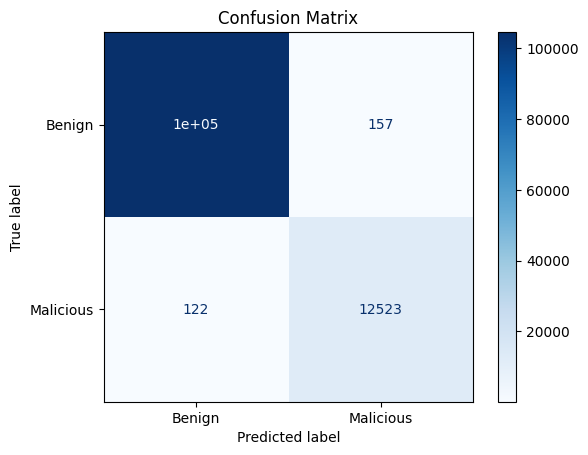

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, display_labels = ['Benign', 'Malicious'], cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

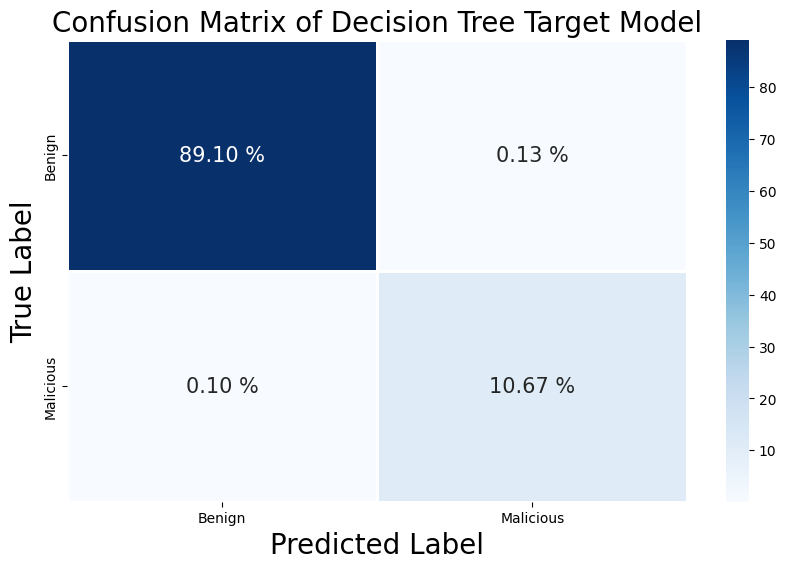

In [55]:
cm = confusion_matrix(y_test, y_pred_dt, labels=model_dt.classes_)
total = np.sum(cm)
confusion_percentage = (cm  / total) * 100

strings = np.asarray([['%', '%'],
                    ['%', '%']])
labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 15})
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.title('Confusion Matrix of Decision Tree Target Model', fontsize=20)
plt.show()

### LogisticRegression

In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)


LogisticRegression()

In [57]:
# Testing
lr_start_test = time.time()
y_pred_lr = model_lr.predict(X_test)
acc_test_lr = accuracy_score(y_test, y_pred_lr)
recall_score_test_lr = recall_score(y_test, y_pred_lr, average='weighted')
lr_end_test = time.time()
lr_testing_time = lr_end_test - lr_start_test


# Validation
lr_start_validation = time.time()
lr_y_val =  model_lr.predict(X_val)
lr_val_acc = accuracy_score(y_val, lr_y_val)
recall_score_val_lr = recall_score(y_val, lr_y_val, average='weighted')
lr_end_validation = time.time()
lr_validation_time = lr_end_validation - lr_start_validation

# Results
print("Logistic Regression")
print("Accuracy: ", acc_test_lr)
print("Recall: ", recall_score_test_lr)
print("Validation Accuracy: ", lr_val_acc)
print("Validation Recall: ", recall_score_val_lr)
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_lr))
print("Classification report: \n", classification_report(y_test, y_pred_lr, target_names=['Benign', 'Malicious'], digits=4))

Logistic Regression
Accuracy:  0.8948040885860307
Recall:  0.8948040885860307
Validation Accuracy:  0.8955068143100511
Validation Recall:  0.8955068143100511
Confusion matrix: 
 [[101722   3033]
 [  9317   3328]]
Classification report: 
               precision    recall  f1-score   support

      Benign     0.9161    0.9710    0.9428    104755
   Malicious     0.5232    0.2632    0.3502     12645

    accuracy                         0.8948    117400
   macro avg     0.7196    0.6171    0.6465    117400
weighted avg     0.8738    0.8948    0.8789    117400



In [58]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
# import pickle

# model_lr = pickle.load(open('../target_model/ml_model/target_lr.pickle', 'rb'))
# y_pred_lr = model_lr.predict(X_test)

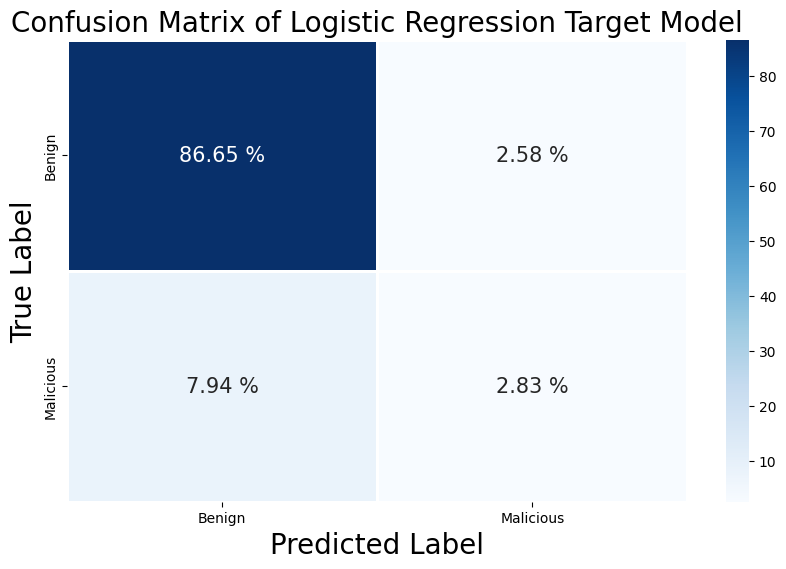

In [59]:
cm = confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
total = np.sum(cm)
confusion_percentage = (cm  / total) * 100

strings = np.asarray([['%', '%'],
                    ['%', '%']])
labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 15})
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.title('Confusion Matrix of Logistic Regression Target Model', fontsize=20)
plt.show()

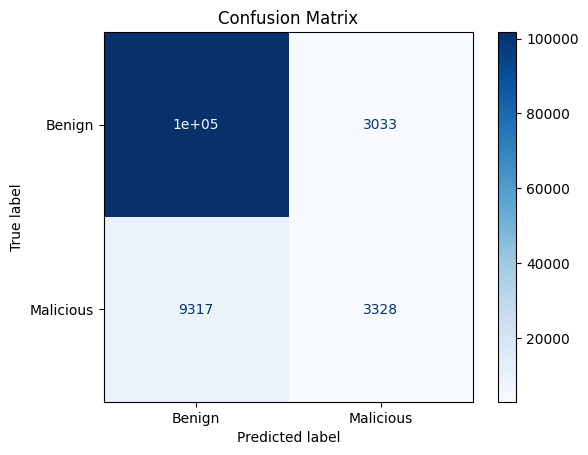

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels = ['Benign', 'Malicious'], cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

### Save Model

In [61]:
import torch
import pickle

# save model
pickle.dump(model_dt, open("../target_model/ml_model/target_dt.pickle", "wb")) # target_model\ml_model
pickle.dump(model_lr, open("../target_model/ml_model/target_lr.pickle", "wb"))
# torch.save(model_dt.state_dict(), 'target/ml_model/model_dt.pth')
# torch.save(model_lr.state_dict(), 'target/ml_model/model_lr.pth')